<a href="https://colab.research.google.com/github/sebarom06/econ3916-statsml/blob/main/Assignment2/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean: 89.49 ms
Median: 36.00 ms
Std: 406.71 ms
Mad: 9.00 ms
Std/mad ratio: 45.19x
Scenario A (Bootcamp, 50% base rate): 98.00%
Scenario B (Econ Class, 5% base rate): 72.06%
Scenario C (Honors Seminar, 0.1% base rate): 4.68%
Chi-Square Statistic: 2.5000
Critical Value (a=0.05, df=1): 3.84

2.5000 ≤ 3.84
Result: VALID - No significant bias detected
All Tokens Mean: $47,650.34
Top 1% Mean: $1,490,810.57
Survivorship Bias Multiplier: 31.29x


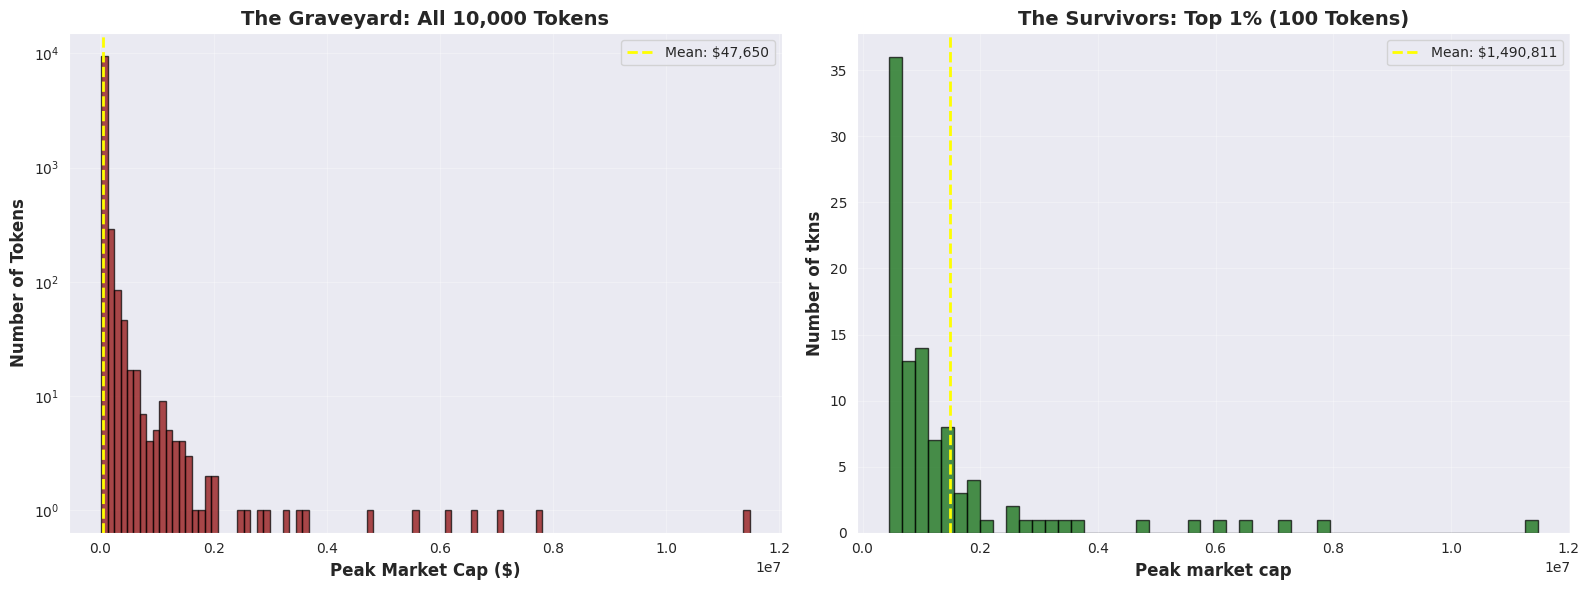

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Phase 1.1: Latency Trap
np.random.seed(42)

normal_traffic = np.random.randint(20, 51, 980)
spike_traffic = np.random.randint(1000, 5001, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

print(f"Mean: {np.mean(latency_logs):.2f} ms")
print(f"Median: {np.median(latency_logs):.2f} ms")

# Phase 1.2: MAD vs SD
def calculate_mad(data):
    median = np.median(data)
    absolute_deviations = np.abs(data - median)
    mad = np.median(absolute_deviations)
    return mad

sd = np.std(latency_logs)
mad = calculate_mad(latency_logs)

print(f"Std: {sd:.2f} ms")
print(f"Mad: {mad:.2f} ms")
print(f"Std/mad ratio: {sd/mad:.2f}x")

# Phase 2: Bayesian audit
def bayesian_audit(prior, sensitivity, specificity):
    p_flagged_given_cheater = sensitivity
    p_flagged_given_not_cheater = 1 - specificity
    p_not_cheater = 1 - prior

    p_flagged = (p_flagged_given_cheater * prior) + (p_flagged_given_not_cheater * p_not_cheater)
    posterior = (p_flagged_given_cheater * prior) / p_flagged

    return posterior

sensitivity = 0.98
specificity = 0.98

posterior_a = bayesian_audit(0.50, sensitivity, specificity)
print(f"Scenario A (Bootcamp, 50% base rate): {posterior_a * 100:.2f}%")

posterior_b = bayesian_audit(0.05, sensitivity, specificity)
print(f"Scenario B (Econ Class, 5% base rate): {posterior_b * 100:.2f}%")

posterior_c = bayesian_audit(0.001, sensitivity, specificity)
print(f"Scenario C (Honors Seminar, 0.1% base rate): {posterior_c * 100:.2f}%")

#Phase 3: Chi-Square srm
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])

chi_square = np.sum(((observed - expected) ** 2) / expected)

print(f"Chi-Square Statistic: {chi_square:.4f}")
print(f"Critical Value (a=0.05, df=1): 3.84")
print(f"\n{chi_square:.4f} {'>' if chi_square > 3.84 else '≤'} 3.84")

if chi_square > 3.84:
    print("Result: INVALID - Sample Ratio Mismatch detected")
else:
    print("Result: VALID - No significant bias detected")

# Task 4.1: Memecoin Graveyard
sns.set_style("darkgrid")
np.random.seed(42)

n_tokens = 10000
shape = 1.16
scale = 10000
market_caps = (np.random.pareto(shape, n_tokens) + 1) * scale

df_all = pd.DataFrame({
    'token_id': range(1, n_tokens + 1),
    'peak_market_cap': market_caps
})

top_1_percent_threshold = np.percentile(market_caps, 99)
df_survivors = df_all[df_all['peak_market_cap'] >= top_1_percent_threshold].copy()

mean_all = df_all['peak_market_cap'].mean()
mean_survivors = df_survivors['peak_market_cap'].mean()

print(f"All Tokens Mean: ${mean_all:,.2f}")
print(f"Top 1% Mean: ${mean_survivors:,.2f}")
print(f"Survivorship Bias Multiplier: {mean_survivors/mean_all:.2f}x")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# The Graveyard
ax1.hist(df_all['peak_market_cap'], bins=100, alpha=0.7, color='darkred', edgecolor='black')
ax1.axvline(mean_all, color='yellow', linestyle='--', linewidth=2, label=f'Mean: ${mean_all:,.0f}')
ax1.set_xlabel('Peak Market Cap ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Tokens', fontsize=12, fontweight='bold')
ax1.set_title(f'The Graveyard: All {n_tokens:,} Tokens', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# The Survivors
ax2.hist(df_survivors['peak_market_cap'], bins=50, alpha=0.7, color='darkgreen', edgecolor='black')
ax2.axvline(mean_survivors, color='yellow', linestyle='--', linewidth=2, label=f'Mean: ${mean_survivors:,.0f}')
ax2.set_xlabel('Peak market cap', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of tkns', fontsize=12, fontweight='bold')
ax2.set_title(f'The Survivors: Top 1% ({len(df_survivors):,} Tokens)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('memecoin_graveyard.png', dpi=300, bbox_inches='tight')